## Import Liraries and Load the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile(r'C:\Users\NEW\Downloads\Data set for BA.xlsx')
sheet_names = xls.sheet_names
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names}
dfs

{'Report Snapshot': Empty DataFrame
 Columns: []
 Index: [],
 'User Acquisition':   First user default channel group  New users  Engaged sessions  \
 0                          Display       9957             12008   
 1                   Organic Search       7652             18141   
 2                      Paid Search       3025              4408   
 3                           Direct       1903              4975   
 4                       Unassigned        325              1619   
 5                   Organic Social         10                13   
 
    Engagement rate  Engaged sessions per user  Average engagement time  \
 0         0.544457                   1.206107                 58.86209   
 1         0.813680                   2.367041                534.31280   
 2         0.474284                   1.458154                102.23780   
 3         0.318808                   2.261364               1128.88100   
 4         0.813159                   4.981538                798.

### Lets Check the sheets & their names.

In [3]:
sheet_names

['Report Snapshot',
 'User Acquisition',
 'Traffic Aquisition',
 'Event Report',
 'Conversion Report',
 'Pages & Screens Report',
 'Retention Overview',
 'User Engagement Overview',
 'Demographics Report',
 'Citiwise Report',
 'Gender Report',
 'User By Interest',
 'User by Language',
 'User By Age',
 'Google Ads Report']

In [4]:
df1 = dfs['User Acquisition'] 
df2 = dfs['Traffic Aquisition']
df3 = dfs['Event Report']
df4 = dfs['Conversion Report']
df5 = dfs['Pages & Screens Report']
df6 = dfs['Demographics Report']
df7 = dfs['Citiwise Report']
df8 = dfs['Gender Report']
df9 = dfs['User By Interest']
df10 = dfs['User by Language']
df11 = dfs['User By Age']
df12 = dfs['Google Ads Report']


### Data cleaning.

### Let's find if there is any null values in the dataframe

In [5]:
dfs_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

for i, df in enumerate(dfs_list, start=1):
    print(f"DataFrame {i}:")
    print(df.isnull().sum())
    print("\n---\n")


DataFrame 1:
First user default channel group    0
New users                           0
Engaged sessions                    0
Engagement rate                     0
Engaged sessions per user           0
Average engagement time             0
Event count                         0
Conversions                         0
Total revenue                       0
dtype: int64

---

DataFrame 2:
Session default channel group          0
Users                                  0
Sessions                               0
Engaged sessions                       0
Average engagement time per session    0
Engaged sessions per user              0
Events per session                     0
Engagement rate                        0
Event count                            0
Conversions                            0
Total revenue                          0
dtype: int64

---

DataFrame 3:
Event name              1
Event count             0
Total users             0
Event count per user    0
Total revenue           0


In [6]:
df3 = df3.dropna()
df3.isnull().sum()

Event name              0
Event count             0
Total users             0
Event count per user    0
Total revenue           0
dtype: int64

(Now, there is no null value & seems fine)

## For a Data Visualization, I choose the 'Seaborn' & 'matplot' library...

## User Acquisition

Let's analyse in the User Acquisition Data & let's which has to be improve...

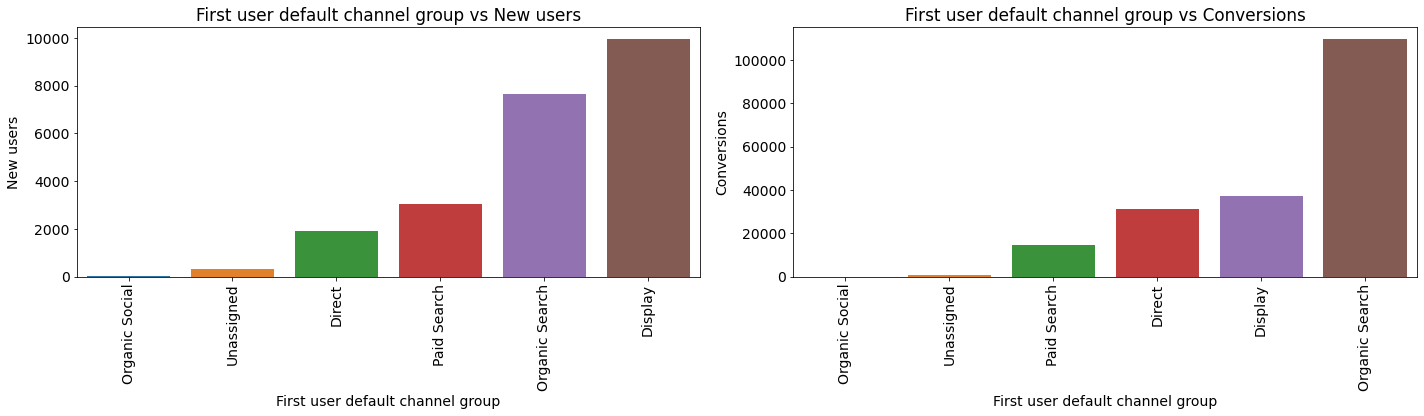

In [7]:
plt.rcParams.update({'font.size': 14})

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# channel group vs New users...
df1 = df1.sort_values('New users')  
sns.barplot(x='First user default channel group', y='New users', data=df1, ax=axs[0])
axs[0].set_title('First user default channel group vs New users')
axs[0].set_xlabel('First user default channel group')
axs[0].set_ylabel('New users')
axs[0].tick_params(axis='x', rotation=90)

# channel group vs Conversions...
df1 = df1.sort_values('Conversions')  
sns.barplot(x='First user default channel group', y='Conversions', data=df1, ax=axs[1])
axs[1].set_title('First user default channel group vs Conversions')
axs[1].set_xlabel('First user default channel group')
axs[1].set_ylabel('Conversions')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


from the data, the Organic search is play a vital role for a conversion.

## Traffic Acquisition

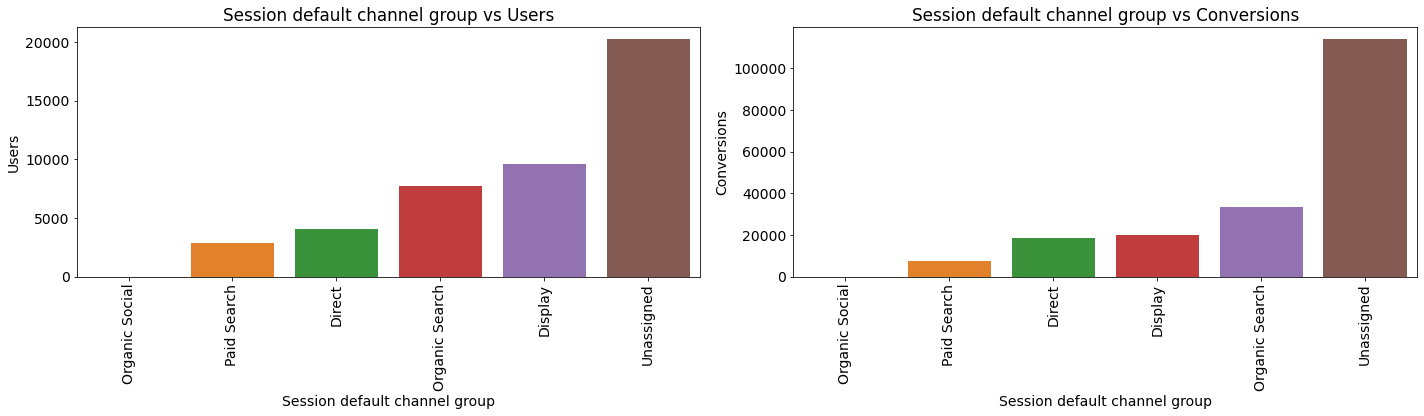

In [8]:
plt.rcParams.update({'font.size': 14})

fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

df2 = df2.sort_values('Users')
sns.barplot(x='Session default channel group', y='Users',data=df2, ax=axs[0])
axs[0].set_title('Session default channel group vs Users')
axs[0].set_xlabel('Session default channel group')
axs[0].set_ylabel('Users')
axs[0].tick_params(axis='x', rotation=90)

df2 = df2.sort_values('Conversions')
sns.barplot(x='Session default channel group', y='Conversions', data=df2, ax=axs[1])
axs[1].set_title('Session default channel group vs Conversions')
axs[1].set_xlabel('Session default channel group')
axs[1].set_ylabel('Conversions')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



"Here, the Unassigned category beats organic search when it comes to conversions."

"Paid search should be improved for the conversion rate."

"The conversion rate is low in paid search."

## Event Report

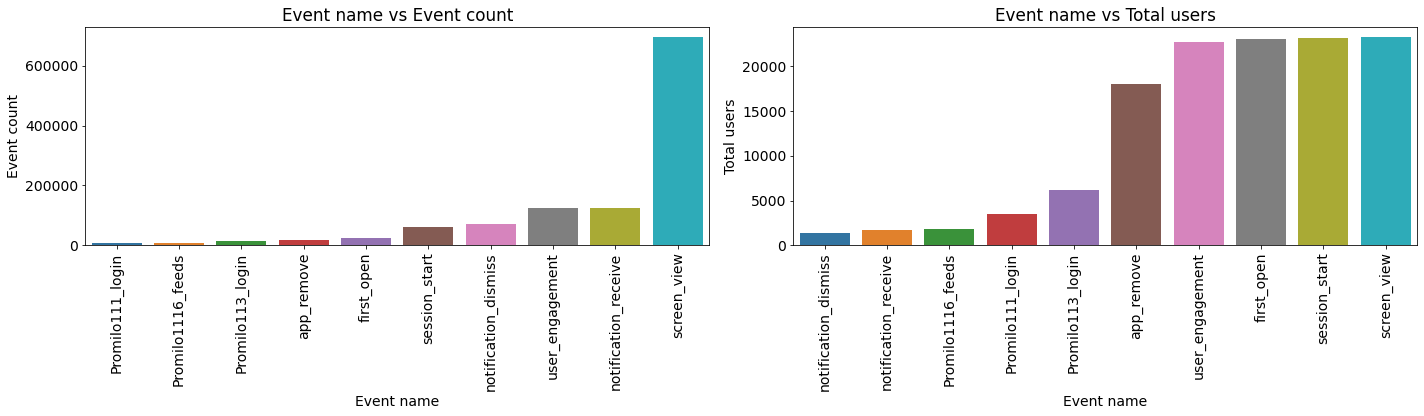

In [9]:
top_events = df3.nlargest(10, 'Event count')['Event name']

fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

df_top = df3[df3['Event name'].isin(top_events)].sort_values('Event count')
sns.barplot(x='Event name', y='Event count', data=df_top, ax=axs[0])
axs[0].set_title('Event name vs Event count')
axs[0].set_xlabel('Event name')
axs[0].set_ylabel('Event count')
axs[0].tick_params(axis='x', rotation=90)

df_top = df3[df3['Event name'].isin(top_events)].sort_values('Total users')
sns.barplot(x='Event name', y='Total users', data=df_top, ax=axs[1])
axs[1].set_title('Event name vs Total users')
axs[1].set_xlabel('Event name')
axs[1].set_ylabel('Total users')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [10]:
import plotly.express as px

# For Better Understanding... (Event name vs Total users)
df_top = df3[df3['Event name'].isin(top_events)].sort_values('Total users')
fig1 = px.line(df_top, x='Event name', y='Total users', title='Event name vs Total users')
fig1.update_traces(mode='markers+lines')
fig1.show()


 When it comes to Promilo, the user's time spent on the app is minimal, and screen views predominantly take precedence, with the user login rate also being very low.

## Conversion Report

In [11]:
df4 = dfs['Conversion Report']
df4.head()

Event name  Conversions  Total users  Total revenue
0   notification_receive        94890         1311              0
1          session_start        56203        21674              0
2             first_open        22872        23059              0
3             app_remove        12468        12538              0
4  Promilo111_otp_screen         1738          855              0

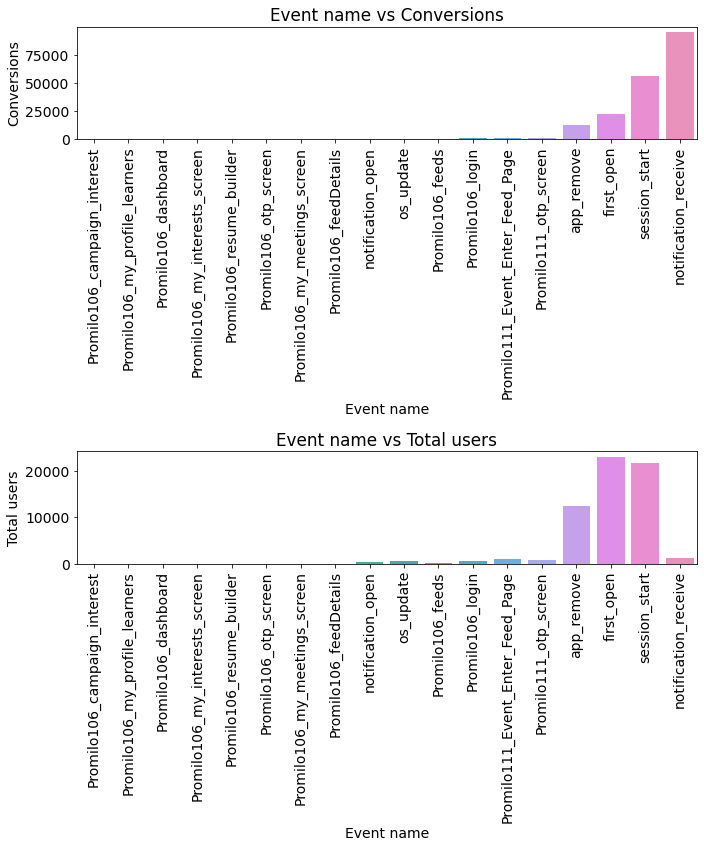

In [12]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 12))

# Event name Vs Conversion...
df4_sorted = df4.sort_values('Conversions')
sns.barplot(x='Event name', y='Conversions', data=df4_sorted, ax=axs[0])
axs[0].set_title('Event name vs Conversions')
axs[0].set_xlabel('Event name')
axs[0].set_ylabel('Conversions')
axs[0].tick_params(axis='x', rotation=90)

# Event name vs Total Users...
sns.barplot(x='Event name', y='Total users', data=df4_sorted, ax=axs[1])
axs[1].set_title('Event name vs Total users')
axs[1].set_xlabel('Event name')
axs[1].set_ylabel('Total users')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [13]:
import plotly.express as px

# Event name Vs Conversions...
df4_sorted = df4.sort_values('Conversions')
fig2 = px.bar(df4_sorted, x='Event name', y='Conversions', title='Event name vs Conversions')
fig2.update_traces(marker_color='indianred')

# Event name vs Total Users...
fig3 = px.bar(df4_sorted, x='Event name', y='Total users', title='Event name vs Total users')
fig3.update_traces(marker_color='lightsalmon')

fig2.show()
fig3.show()


In the Conversion Vs Event Name chart, notifications play a vital role in conversions. Perhaps, when a customer sees a notification, it triggers the user to engage with it.

## Page path and screen class

In [14]:
print(df5.columns)
df5.head(2)

Index(['Page path and screen class', 'Views', 'Users', 'Views per user',
       'Average engagement time', 'Event count', 'Conversions',
       'Total revenue'],
      dtype='object')


Page path and screen class   Views  Users  Views per user  \
0                    Flutter  156708   8726        17.95874   
1               MainActivity   44326   8978         4.93718   

   Average engagement time  Event count  Conversions  Total revenue  
0                 83.41222       203901          328              0  
1                 78.29216        53374          101              0

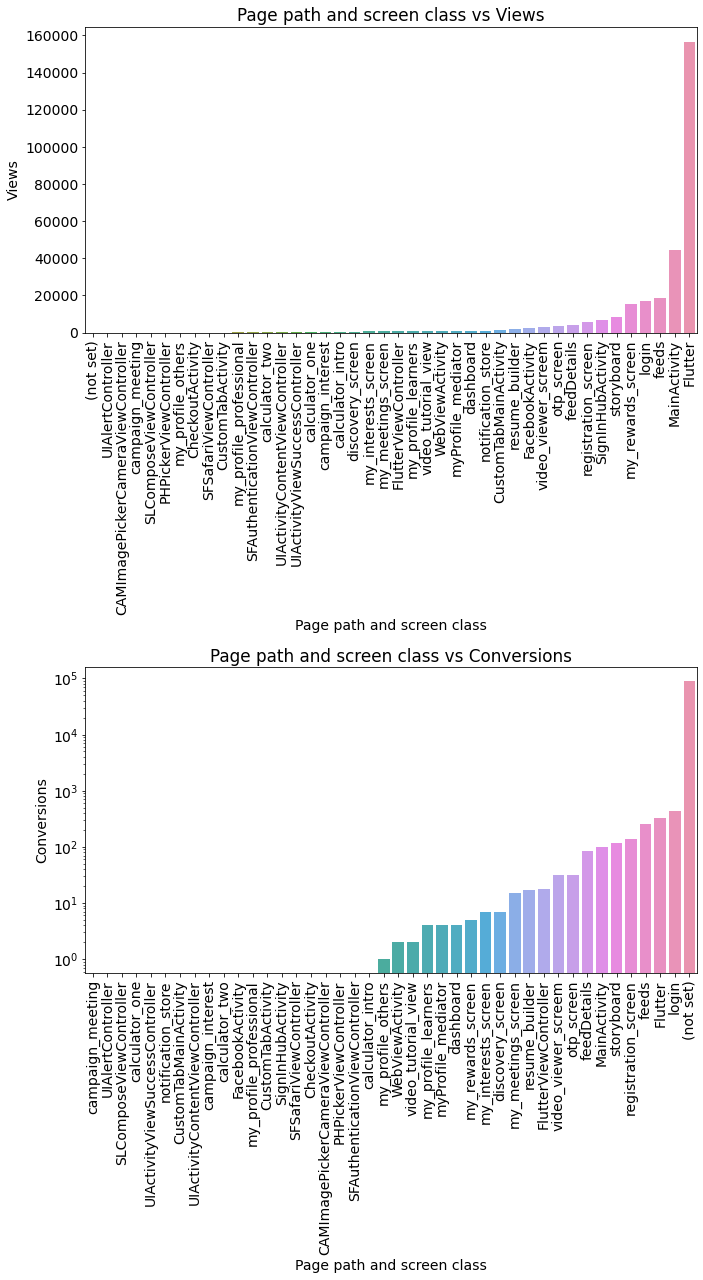

In [15]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 18))

df5_sorted = df5.sort_values('Views')
sns.barplot(x='Page path and screen class', y='Views', data=df5_sorted, ax=axs[0])
axs[0].set_title('Page path and screen class vs Views')
axs[0].set_xlabel('Page path and screen class')
axs[0].set_ylabel('Views')
axs[0].tick_params(axis='x', rotation=90)

df5_sorted = df5.sort_values('Conversions')
sns.barplot(x='Page path and screen class', y='Conversions', data=df5_sorted, ax=axs[1])
axs[1].set_title('Page path and screen class vs Conversions')
axs[1].set_xlabel('Page path and screen class')
axs[1].set_ylabel('Conversions')
axs[1].tick_params(axis='x', rotation=90)

# Set y-axis to logarithmic scale
axs[1].set_yscale('log')

plt.tight_layout()
plt.show()




In these pages, such as the main activity, Flutter, login, and storyboard, are highly viewed by the users.

## Demographics Report

In [16]:
df6 = dfs['Demographics Report']
print(df6.columns)
df6.head()

Index(['Country', 'Users', 'New users', 'Engaged sessions', 'Engagement rate',
       'Engaged sessions per user', 'Average engagement time', 'Event count',
       'Conversions', 'Total revenue'],
      dtype='object')


Country  Users  New users  Engaged sessions  Engagement rate  \
0           India  23024      22528             41479         0.593626   
1   United States    272        213               197         0.491272   
2          Canada     37         18                25         0.416667   
3       (not set)     36         36                17         0.459459   
4  United Kingdom     20          8                13         0.371429   

   Engaged sessions per user  Average engagement time  Event count  \
0                   1.801555                334.81660      1312097   
1                   0.724265                 50.96324         3157   
2                   0.675676                 43.21622          410   
3                   0.472222                 24.80556          241   
4                   0.650000                 61.85000          289   

   Conversions  Total revenue  
0       192766              0  
1          643              0  
2          121              0  
3           54              0  
4           43              0

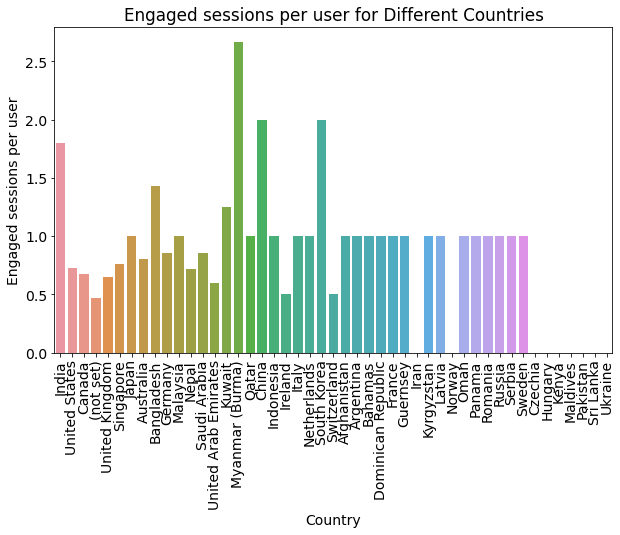

In [17]:
df6 = dfs['Demographics Report']

plt.figure(figsize=(10, 6))
sns.barplot(x=df6['Country'], y=df6['Engaged sessions per user'])
plt.title('Engaged sessions per user for Different Countries')
plt.xlabel('Country')
plt.ylabel('Engaged sessions per user')
plt.xticks(rotation=90)  
plt.show()


The Users from the Myanmar(Burma) are more engaging in this session...

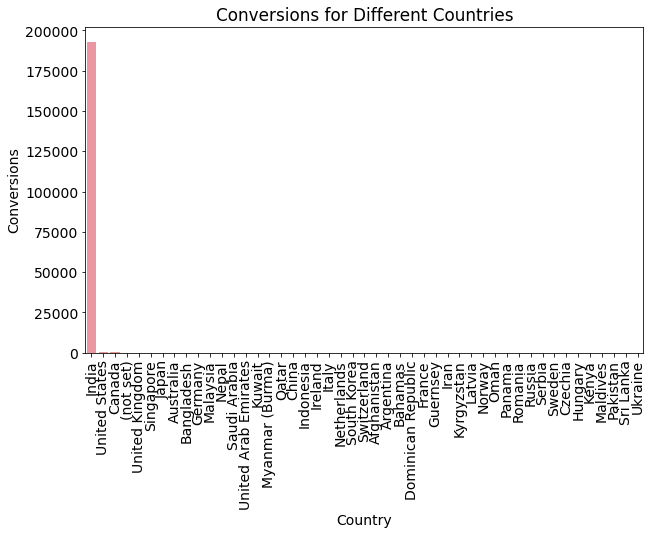

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df6['Country'], y=df6['Conversions'])
plt.title('Conversions for Different Countries')
plt.xlabel('Country')
plt.ylabel('Conversions')
plt.xticks(rotation=90)  
plt.show()


India has a higher conversion rate 

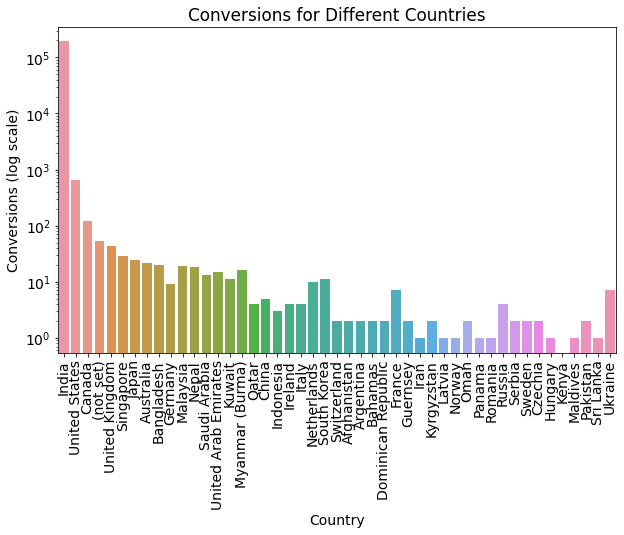

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df6['Country'], y=df6['Conversions'])
plt.title('Conversions for Different Countries')
plt.xlabel('Country')
plt.ylabel('Conversions (log scale)')
plt.yscale('log')  # Set the y-axis to log scale
plt.xticks(rotation=90)  
plt.show()


when it ccomes to contry, india play a vital in the conversion.

## Citywise Report

In [20]:
df7 = dfs['Citiwise Report']
df7.head()

Town/City  Users  New users  Engaged sessions  Engagement rate  \
0  Bengaluru   6097       5685             15013         0.769385   
1      Patna   1594       1467              2127         0.440646   
2  Hyderabad   1038        920              1578         0.569264   
3     Indore    983        915              1241         0.426460   
4    Lucknow    897        839              1125         0.450180   

   Engaged sessions per user  Average engagement time  Event count  \
0                   2.462359                762.20550       607200   
1                   1.334379                 98.22208        38830   
2                   1.520231                243.69080        96826   
3                   1.262462                 67.89115        21383   
4                   1.254181                 83.40580        21041   

   Conversions  Total revenue  
0        62939              0  
1         6980              0  
2        34103              0  
3         4121              0  
4         3650              0

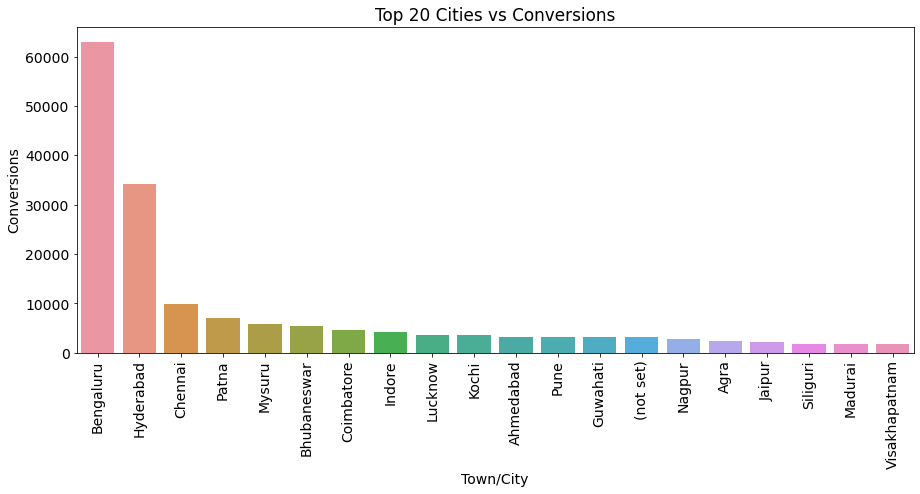

In [21]:
top_cities = df7.nlargest(20, 'Conversions')

plt.figure(figsize=(15, 6))
sns.barplot(x='Town/City', y='Conversions', data=top_cities)
plt.title('Top 20 Cities vs Conversions')
plt.xlabel('Town/City')
plt.ylabel('Conversions')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()


In citiwise, the bengaluru has the highest conversion rate, second highest is hyderabad.

## Gender Report

In [22]:
df8 = dfs['Gender Report']
df8.head()

Gender  Users  New users  Engaged sessions  Engagement rate  \
0  unknown  13142      12691             23161         0.564077   
1     male   7218       5877             10467         0.543091   
2   female   4944       4304              7877         0.637710   

   Engaged sessions per user  Average engagement time  Event count  \
0                   1.762365                 439.5776       761771   
1                   1.450125                 128.2319       282504   
2                   1.593244                 208.7407       274254   

   Conversions  Total revenue  
0        93180              0  
1        65651              0  
2        35083              0

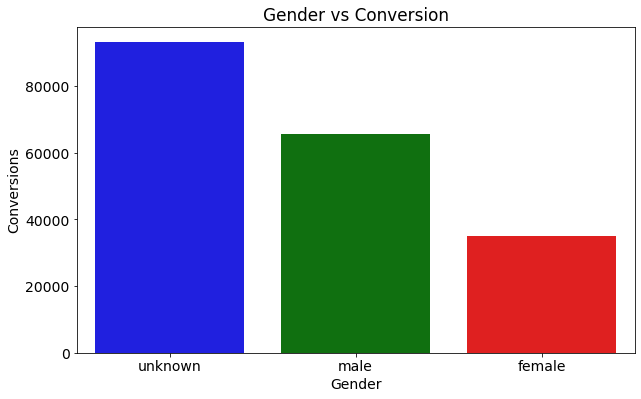

In [23]:
genders = df8['Gender']
conversions = df8['Conversions']

plt.figure(figsize=(10,6))
sns.barplot(x=genders, y=conversions, palette=['blue', 'green', 'red'])
plt.title('Gender vs Conversion')
plt.xlabel('Gender')
plt.ylabel('Conversions')
plt.show()


Users hide their gender when logging in, so it may be considered as unknown. Apart from that, males have a higher conversion rate.

## User By Instrest

In [24]:
df9 = dfs['User By Interest']

df9.head()

Interests  Users  New users  \
0                                       Shoppers  10950       9256   
1  Media & Entertainment/Comics & Animation Fans  10946       9247   
2                  Technology/Mobile Enthusiasts  10934       9239   
3              Food & Dining/Cooking Enthusiasts   8410       6970   
4        Sports & Fitness/Health & Fitness Buffs   5844       4580   

   Engaged sessions  Engagement rate  Engaged sessions per user  \
0             15652         0.581534                   1.429406   
1             15680         0.583008                   1.432487   
2             15619         0.582451                   1.428480   
3             12332         0.602325                   1.466350   
4              8226         0.588328                   1.407598   

   Average engagement time  Event count  Conversions  Total revenue  
0                 162.8347       490664        86846              0  
1                 165.1772       491025        86845              0  
2                 162.6945       489353        86742              0  
3                 176.9567       409713        73814              0  
4                 155.1451       257831        43074              0

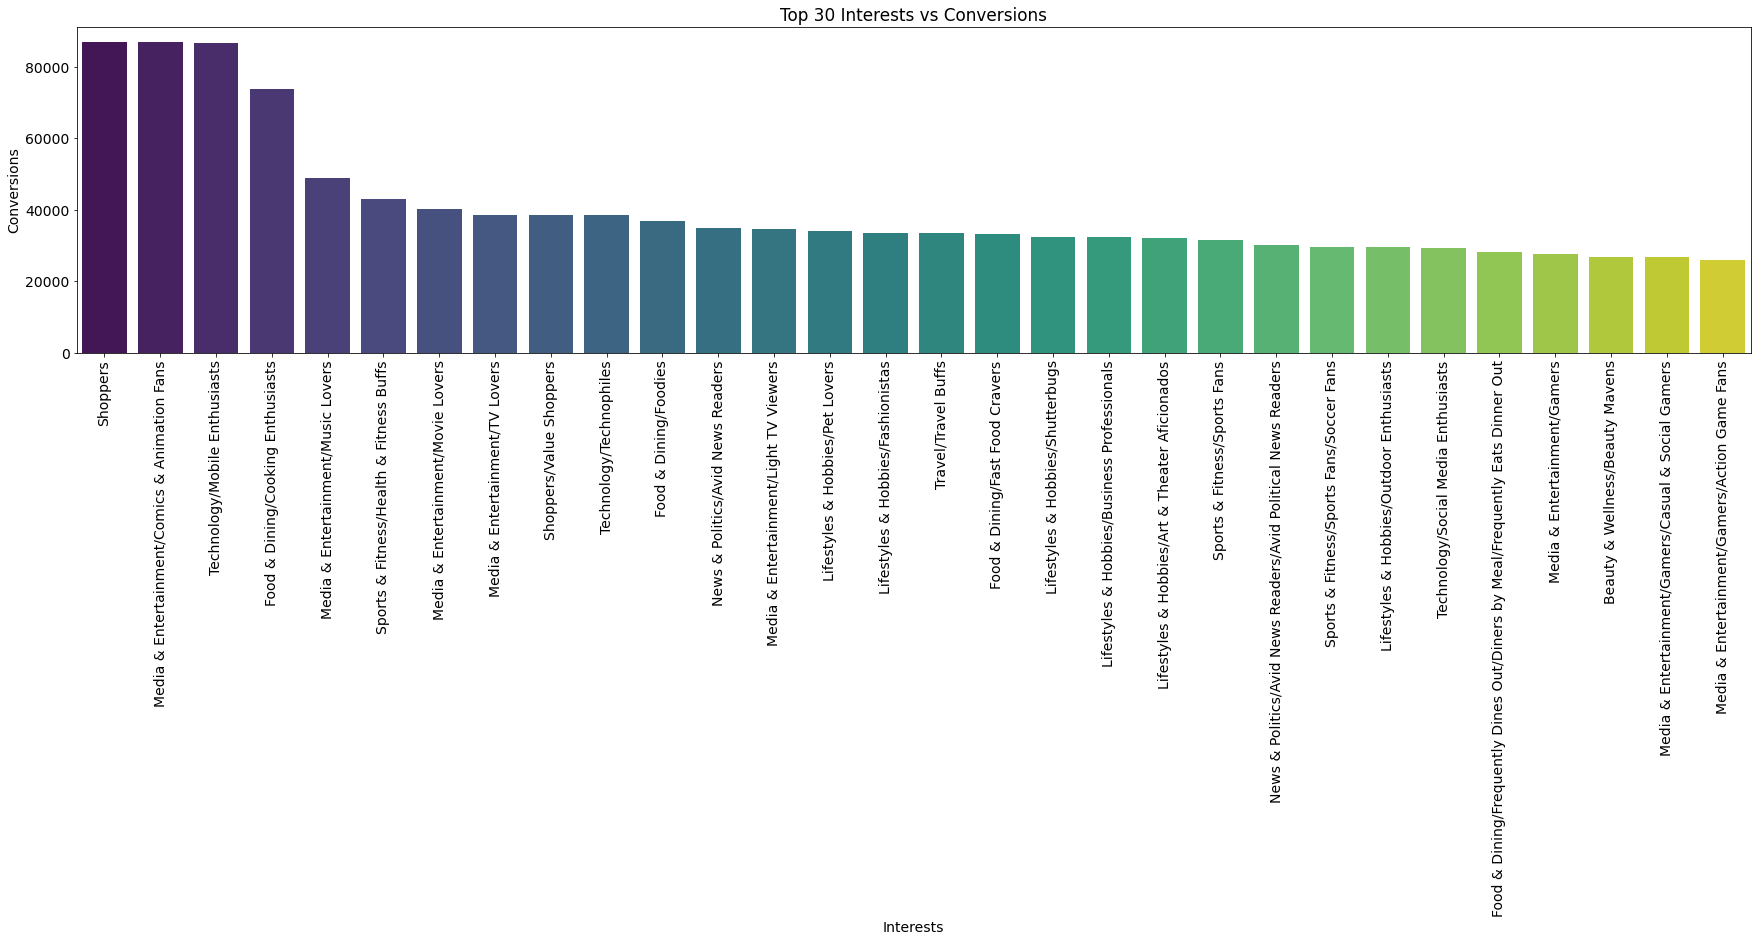

In [25]:
df_top30 = df9.sort_values('Conversions', ascending=False).head(30)

interests = df_top30['Interests']
conversions = df_top30['Conversions']

plt.figure(figsize=(30,6))
sns.barplot(x=interests, y=conversions, palette='viridis')
plt.title('Top 30 Interests vs Conversions')
plt.xlabel('Interests')
plt.ylabel('Conversions')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()


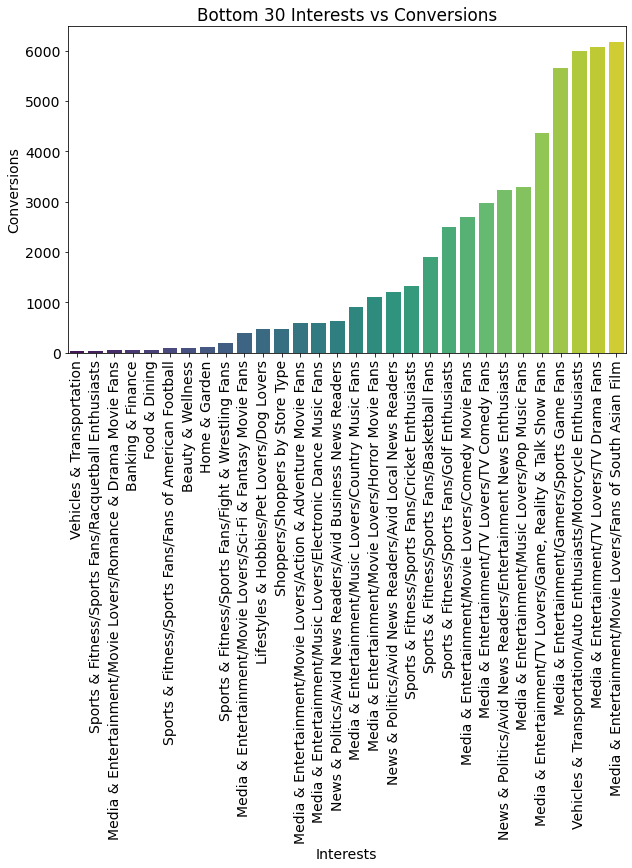

In [26]:
# Sort by 'Conversions' and take bottom 30
df_bottom30 = df9.sort_values('Conversions', ascending=True).head(30)

interests = df_bottom30['Interests']
conversions = df_bottom30['Conversions']

plt.figure(figsize=(10,6))
sns.barplot(x=interests, y=conversions, palette='viridis')
plt.title('Bottom 30 Interests vs Conversions')
plt.xlabel('Interests')
plt.ylabel('Conversions')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()


from the top & bottom analysis of User's Intrest, User highly focusing the shopping, media entertainment and technology and mobile enthusiasts.

and users are not focusing on vehicles, fitness, & banking category

## User by Language.

In [27]:
df10 = dfs['User by Language']
df10.head(3)

Language  Users  New users  Engaged sessions  Engagement rate  \
0  English  22495      21990             40639         0.595147   
1    Hindi    586        552               798         0.406314   
2  Marathi     85         84                98         0.426087   

   Engaged sessions per user  Average engagement time  Event count  \
0                   1.806579                341.36350      1297970   
1                   1.361775                 60.03413        13523   
2                   1.152941                 38.48235         1589   

   Conversions  Total revenue  
0       189946              0  
1         2699              0  
2          323              0

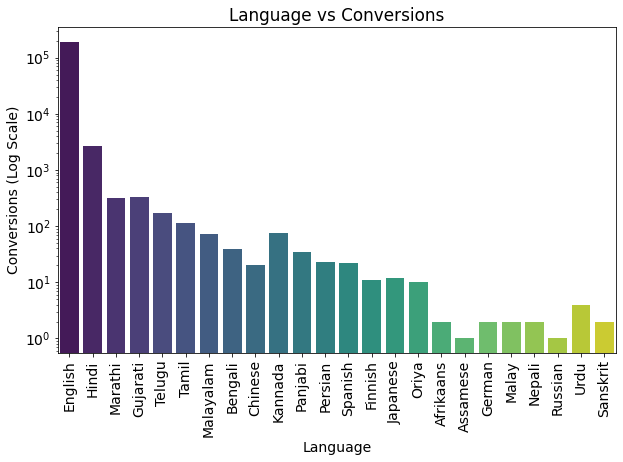

In [28]:

languages = df10['Language']
conversions = df10['Conversions']

plt.figure(figsize=(10,6))
sns.barplot(x=languages, y=conversions, palette='viridis')
plt.title('Language vs Conversions')
plt.xlabel('Language')
plt.ylabel('Conversions (Log Scale)')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

# Set y-axis to logarithmic scale
plt.yscale('log')

plt.show()


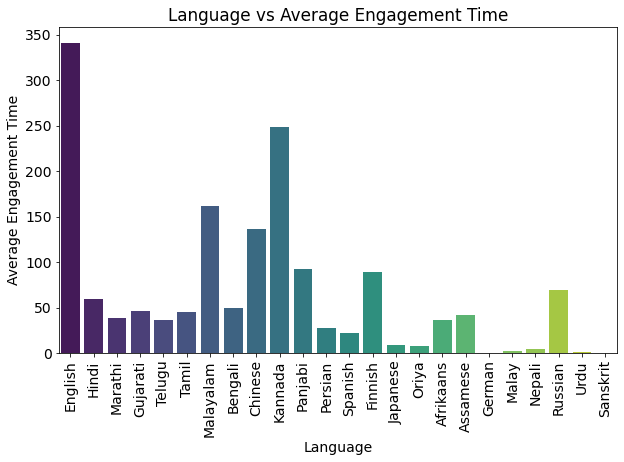

In [29]:
languages = df10['Language']
avg_engagement_time = df10['Average engagement time']

plt.figure(figsize=(10,6))
sns.barplot(x=languages, y=avg_engagement_time, palette='viridis')
plt.title('Language vs Average Engagement Time')
plt.xlabel('Language')
plt.ylabel('Average Engagement Time')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()


English Language is play mojor role when it comes to conversion and engagement time.

## User by Age

In [30]:
df11 = dfs['User By Age']
df11.head(2)

Age  Users  New users  Engaged sessions  Engagement rate  \
0  unknown  14303      13636             24976         0.569098   
1    18-24   4282       3678              7291         0.695308   

   Engaged sessions per user  Average engagement time  Event count  \
0                   1.746207                 422.2233       817501   
1                   1.702709                 251.1630       309328   

   Conversions  Total revenue  
0        99310              0  
1        53661              0

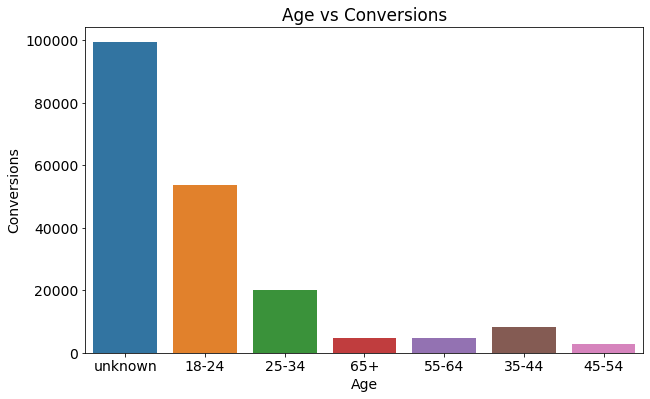

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Conversions', data=df11)
plt.title('Age vs Conversions')
plt.show()


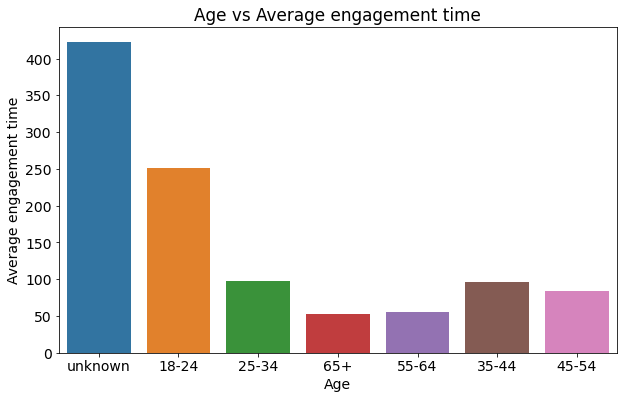

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Average engagement time', data=df11)
plt.title('Age vs Average engagement time')
plt.show()

people hide their age, while log in. so its consider as a unknown. The unknown category are in higher conversion.

18-24 age people are second highest in conversion

45-54 age people are less when comes to conversion

65+ age people are heving less engagement time



## Google Ads Report

We need to more focus paid marketing campaign.

Let see what are the thing working and not working for a converison the Users

In [33]:
df12 = dfs['Google Ads Report']
df12.head(2)

Session Google Ads campaign  Users  Sessions  Engaged sessions  \
0    App Installation for May --Shahid   5429     10936              6276   
1  App Install-States-A200Inst-20Jun22    842      1655               968   

   Google Ads clicks  Google Ads cost  Google Ads cost per click  Conversions  \
0             147100        179175.00                   1.218049        12257   
1              28742         24309.13                   0.845770         1794   

   Cost per conversion  Event count  Total revenue  Return on ad spend  
0             14.61818        97802              0                   0  
1             13.55024        15311              0                   0

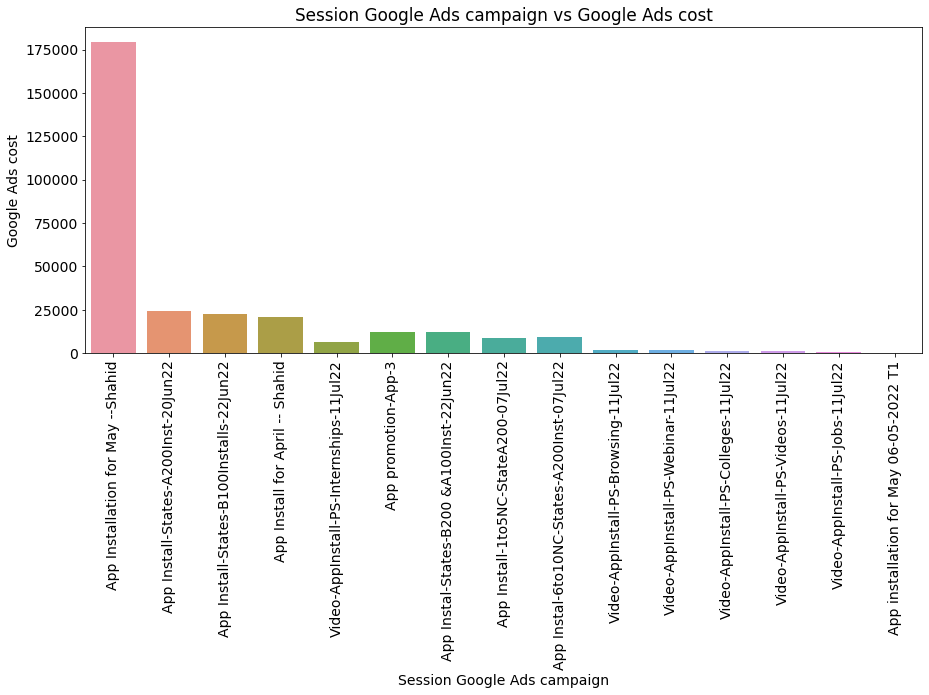

In [34]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Session Google Ads campaign', y='Google Ads cost', data=df12)
plt.title('Session Google Ads campaign vs Google Ads cost')
plt.xticks(rotation=90) 
plt.show()


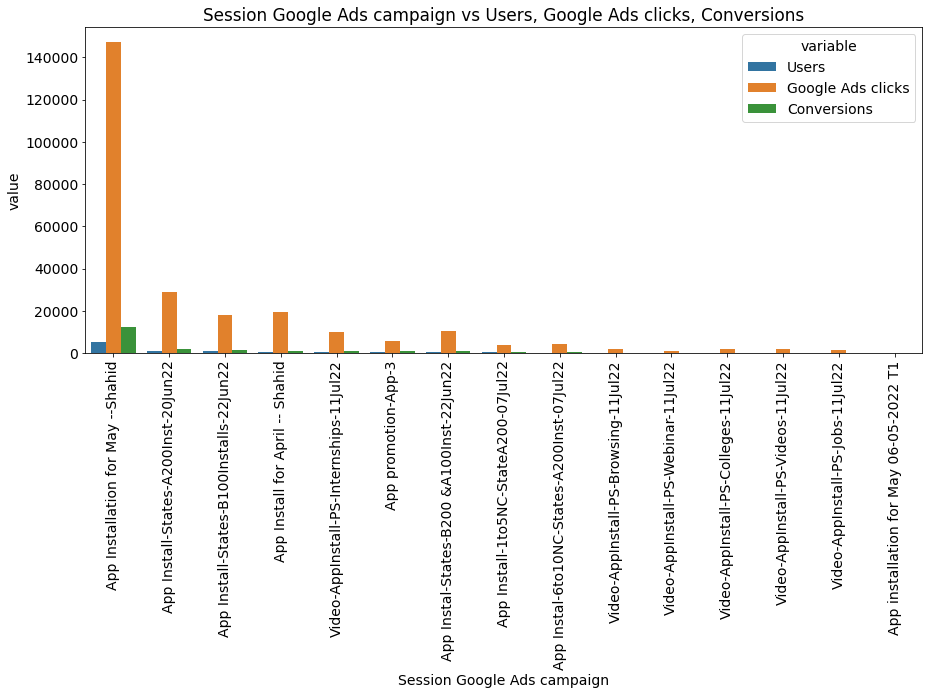

In [35]:
df_melted = df12.melt(id_vars='Session Google Ads campaign', value_vars=['Users', 'Google Ads clicks', 'Conversions'])

plt.figure(figsize=(15, 6))
sns.barplot(x='Session Google Ads campaign', y='value', hue='variable', data=df_melted)
plt.title('Session Google Ads campaign vs Users, Google Ads clicks, Conversions')
plt.xticks(rotation=90) 
plt.show()


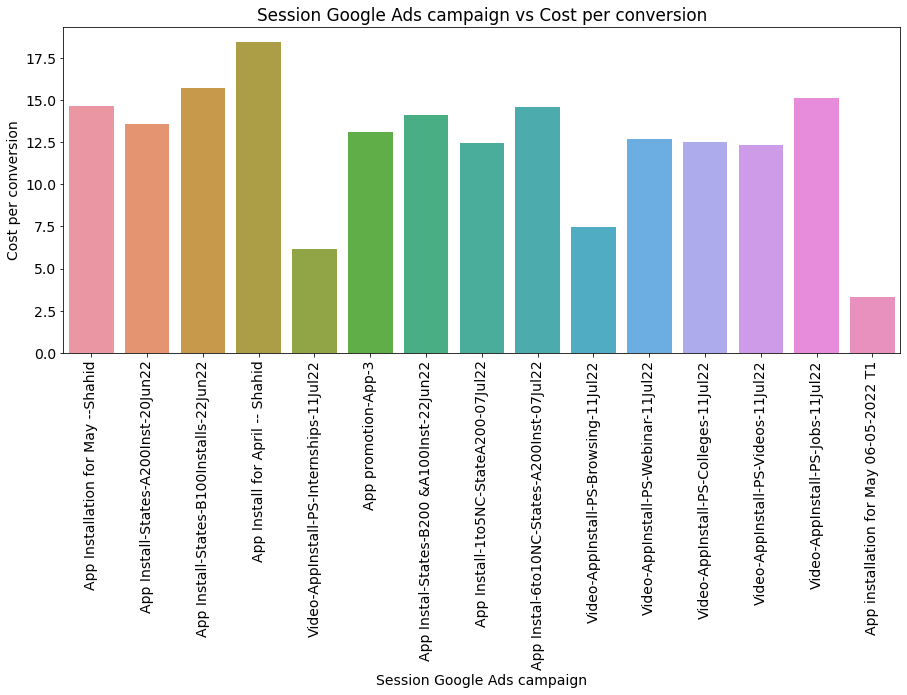

In [36]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Session Google Ads campaign', y='Cost per conversion', data=df12)
plt.title('Session Google Ads campaign vs Cost per conversion')
plt.xticks(rotation=90) 
plt.show()


### --------------------------- IMPORTANT THINGS FROM THE ANALYSIS ----------------------------------

1. In User Acquisition: Organic Search is the most important factor for user conversion.

2. In Traffic Acquisition: The Unassigned Category is crucial for conversions.

3. In Event Report: Screen Views, Session Starts, First Opens, and User Engagements occur more frequently during user usage.

4. In Conversion Report: Notifications play a vital role in conversions. When a customer sees a notification, it triggers user engagement.

5. In Page Path and Screen Class: If a conversion occurs, the Login Page appears more frequently. Login Flutter, Feeds, Storyboard, etc., are major components here.

6. In Demographics Report: India has the highest conversion rate, while Kenya, Panama, Maldives, Sri Lanka, and Romania have the lowest conversions.

7. In Citywise Report: Bengaluru has the highest conversion rate, followed by Hyderabad.

8. In Gender Report: Users often do not specify their gender during login, resulting in it being considered unknown. Additionally, males have a higher conversion rate.

9. In User by Interest: Users are interested in shopping, media entertainment, technology, and mobile usage.

10. In User by Language: Users primarily use English, followed by Hindi, which has the highest conversion rate.

11. In User by Age: People aged 18-24 have the second-highest conversion rate, while those aged 45-54 have lower conversion rates. Those aged 65+ have less engagement time.

12. In Google Ads Report: The cost per conversion is higher for April app installations. Despite the amount paid for Google Ads, the conversion rate is very low.

# ------------------------ NEEDS TO IMPROVRE ------------------------------

1. Users are required to provide their correct age and gender during login; only then can we analyze which categories people interact with our products most.


2. In the Indian region, we need to focus on tier-2 and tier-3 cities.


3. In the 25-34 age category, the conversion rate is very low. Despite users being independent in that category, conversions are low. We need to focus more on that age group.


4. Vehicle, Food & Dining, Finance & Banking, Home & Garden, and Wellness are the least interesting to users. Perhaps we should focus on improving or discontinuing them.


5. We must be cautious about investing in Google Ads because the conversion rate is very low considering the money we allocate to the ads.
 